ML

지도학습 비지도학습(label이 있는) 강화학습




지도학습

입력데이터와 정답데이터가 학습데이터로 함께 제공되는 방법

- Regression
- Classification



비지도 학습

입력데이터만 있고 정답데이터는 없는 상태에서 학습하고 출력데이터를 얻는 방법

- Cluster Analysis
- Dimension Reduction(통계적 기법)



강화학습

측정값을 입력받고 행동 방침을 출력하는 방법


분류 분석중 Decision tree


Decision tree 의 중요 hyper parameter 는 depth이다.


information gain 이 가장 큰것 선택

엔트로피 지수, 지니 지수로 확인.

In [2]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dtreeplt import dtreeplt

In [3]:
iris_dataset = datasets.load_iris()

In [4]:
X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, ytest = \
train_test_split(X,y,test_size = 0.3, random_state = 58)

In [5]:
clf = tree.DecisionTreeClassifier()

In [6]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [7]:
print('훈련의 세트 점수 : {:.3f}'.format(clf.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(clf.score(X_test, ytest)))

훈련의 세트 점수 : 1.000
테스트 세트 점수 : 0.933


In [8]:
dtree = dtreeplt(
    model = clf,
    feature_names=iris_dataset.feature_names,
    target_names=iris_dataset.target_names)

C:\Users\admin\Anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:258: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  arrowprops=dict(arrowstyle='->')


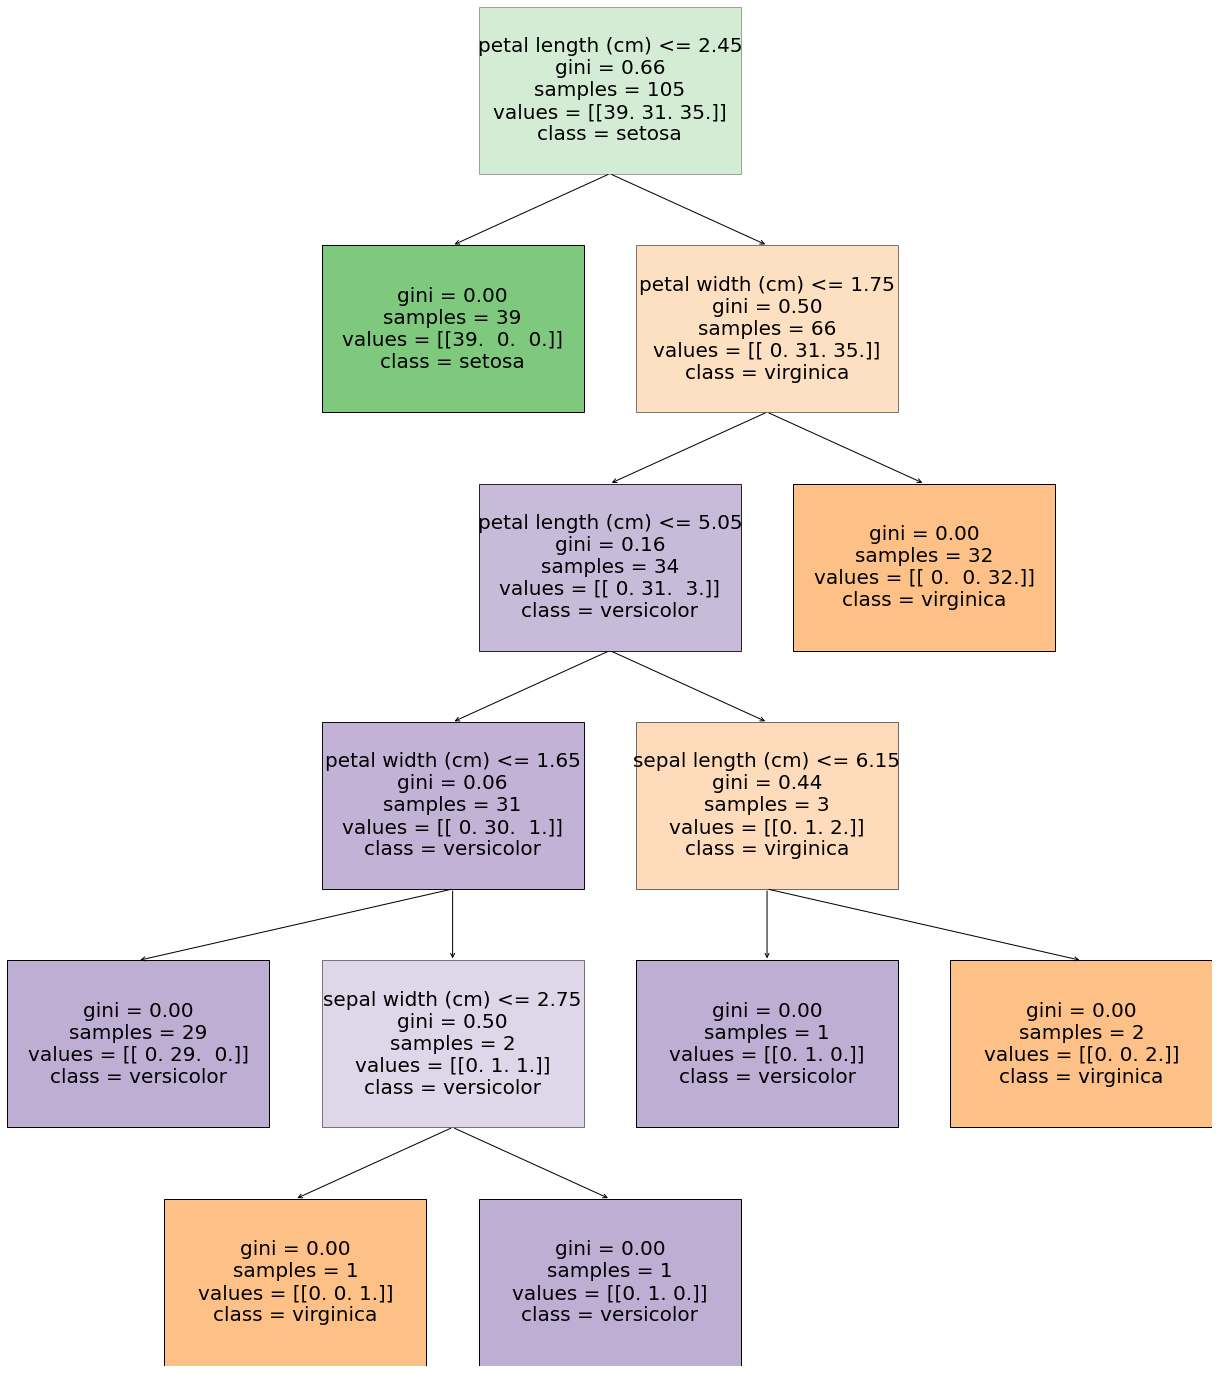

In [9]:
fig = dtree.view()

(-1.0, 4.0)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from c

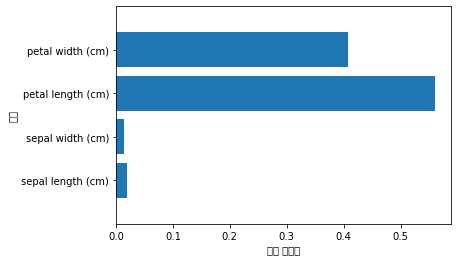

In [10]:
n_features = iris_dataset.data.shape[1]
plt.barh(range(n_features), clf.feature_importances_,align = 'center')
plt.yticks(np.arange(n_features),iris_dataset.feature_names)
plt.xlabel('변수 중요도',)
plt.ylabel('특성')
plt.ylim(-1,n_features)

In [11]:
fig.savefig('dtree.png')

- 결정트리의 복잡도 제어 --> 과대적합의 방지
- 사전가지치기(prunning)

In [12]:
clf1 = tree.DecisionTreeClassifier(max_depth=3)

In [13]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [14]:
print('훈련의 세트 점수 : {:.3f}'.format(clf1.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(clf1.score(X_test, ytest)))

훈련의 세트 점수 : 0.981
테스트 세트 점수 : 0.956


In [15]:
import matplotlib
import matplotlib.font_manager as fm
from matplotlib import rc

In [16]:
font_name = fm.FontProperties(fname = 'C:\\WINDOWS\\Fonts\\malgun.TTF')
font_name.get_name()
rc('font', family = font_name.get_name())

In [17]:
clf1.feature_importances_

array([0.        , 0.        , 0.58739009, 0.41260991])

(-1.0, 4.0)

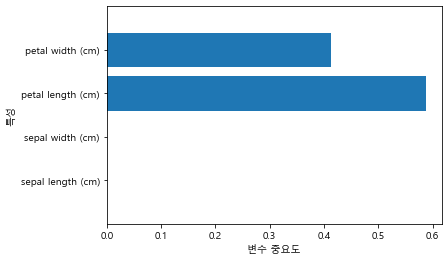

In [18]:
n_features = iris_dataset.data.shape[1]
plt.barh(range(n_features), clf1.feature_importances_,align = 'center')
plt.yticks(np.arange(n_features),iris_dataset.feature_names)
plt.xlabel('변수 중요도',)
plt.ylabel('특성')
plt.ylim(-1,n_features)

In [19]:
dtree = dtreeplt(
    model = clf1,
    feature_names=iris_dataset.feature_names,
    target_names=iris_dataset.target_names)

C:\Users\admin\Anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:258: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  arrowprops=dict(arrowstyle='->')


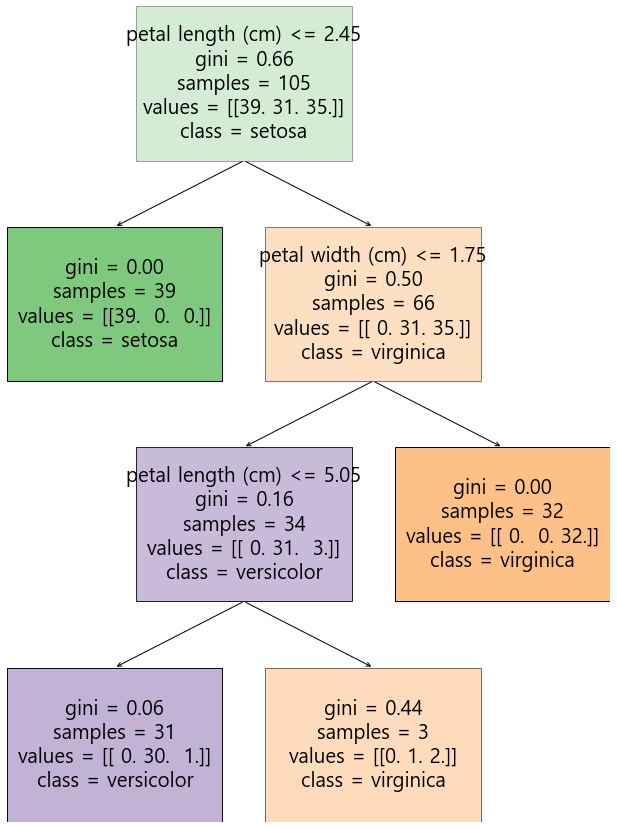

In [20]:
fig = dtree.view()

In [21]:
clf1.predict(X_test)

array([1, 1, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0,
       0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0,
       1])

In [23]:
ytest

array([1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0,
       0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0,
       1])

In [24]:
ytest == clf1.predict(X_test)

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

---

In [26]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dtreeplt import dtreeplt

In [27]:
breast_cancer_dataset = datasets.load_breast_cancer()

In [28]:
print(breast_cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [29]:
X = breast_cancer_dataset.data
y = breast_cancer_dataset.target

X_train, X_test, y_train, ytest = \
train_test_split(X,y,test_size = 0.2, random_state = 10)

In [30]:
clf = tree.DecisionTreeClassifier()

In [31]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [32]:
print('훈련의 세트 점수 : {:.3f}'.format(clf.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(clf.score(X_test, ytest)))

훈련의 세트 점수 : 1.000
테스트 세트 점수 : 0.895


In [37]:
dtree = dtreeplt(
    model = clf,
    feature_names=breast_cancer_dataset.feature_names,
    target_names=breast_cancer_dataset.target_names)

C:\Users\admin\Anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:258: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  arrowprops=dict(arrowstyle='->')


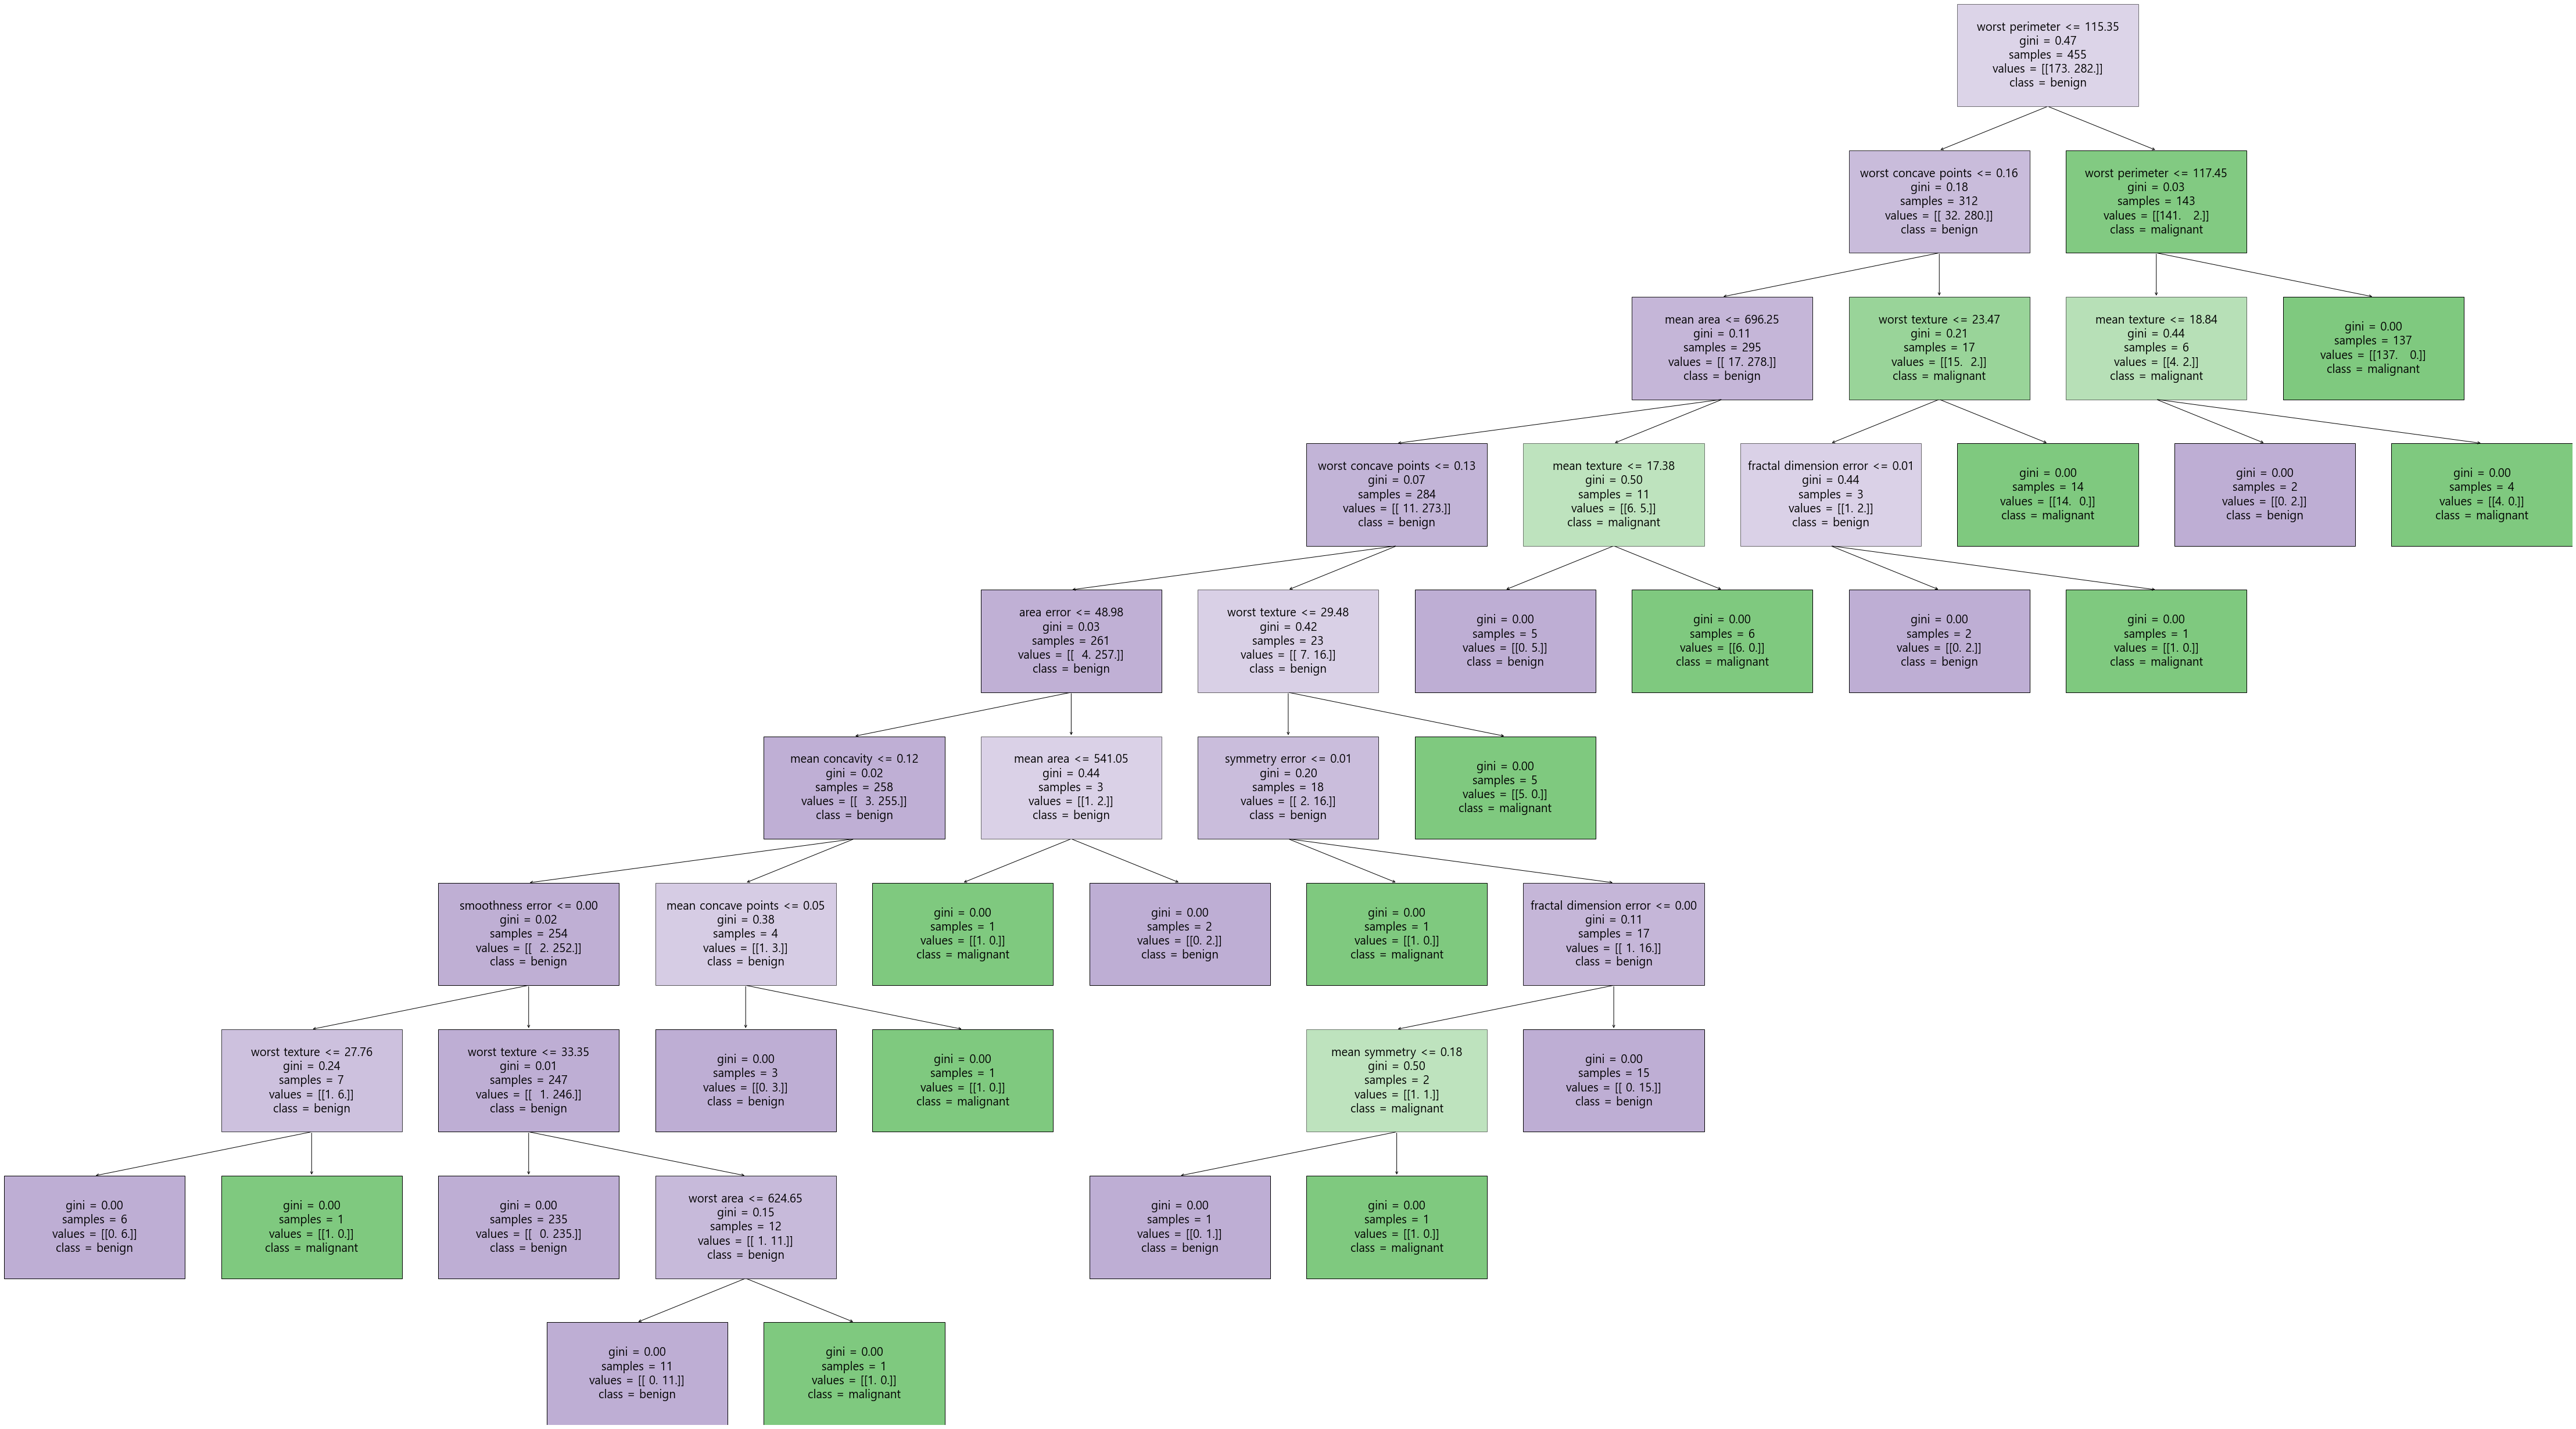

In [38]:
fig = dtree.view()

In [39]:
fig.savefig('breast_cancor_dtree.png')

In [40]:
clf1 = tree.DecisionTreeClassifier(max_depth=5)

In [41]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [42]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [43]:
print('훈련의 세트 점수 : {:.3f}'.format(clf1.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(clf1.score(X_test, ytest)))

훈련의 세트 점수 : 0.987
테스트 세트 점수 : 0.939


In [44]:
dtree = dtreeplt(
    model = clf1,
    feature_names=breast_cancer_dataset.feature_names,
    target_names=breast_cancer_dataset.target_names)

C:\Users\admin\Anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:258: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  arrowprops=dict(arrowstyle='->')


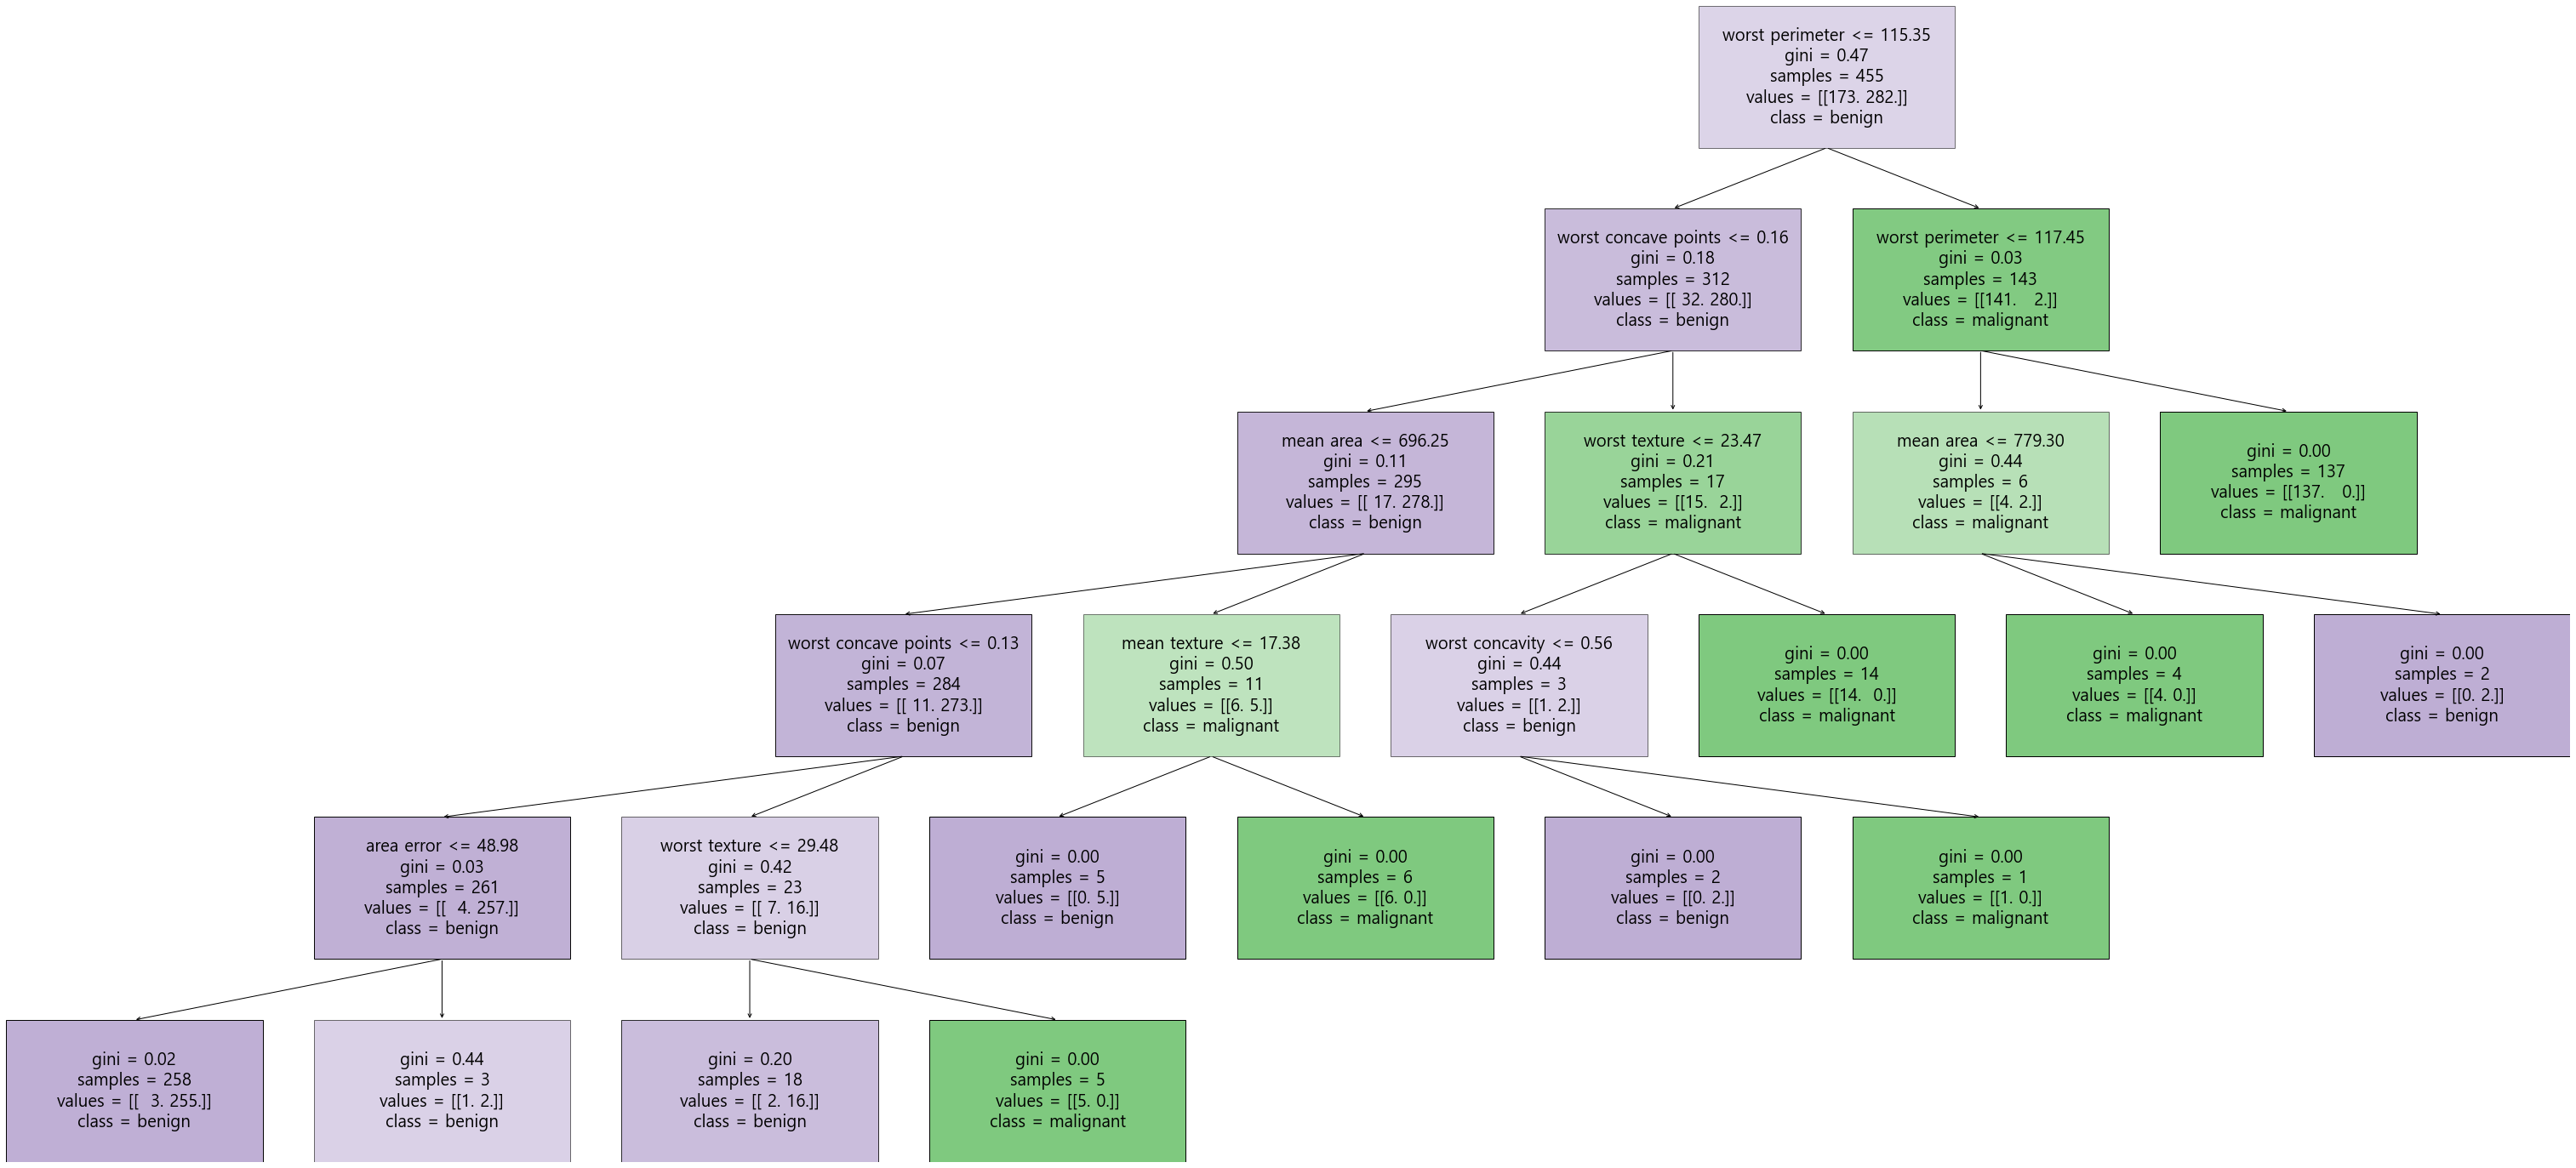

In [45]:
fig = dtree.view()

In [46]:
fig.savefig('breast_cancor_dtree_depth5.png')

In [47]:
clf2 = tree.DecisionTreeClassifier(max_depth=4)

In [48]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [49]:
print('훈련의 세트 점수 : {:.3f}'.format(clf2.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(clf2.score(X_test, ytest)))

훈련의 세트 점수 : 0.976
테스트 세트 점수 : 0.930


In [51]:
best_score = []

for j in np.arange(100):
    score =[]
    for i in np.arange(1,12):
        clf_temp = tree.DecisionTreeClassifier(max_depth=i)
        clf_temp.fit(X_train,y_train)
        print('depth',i,'테스트 세트 점수 : {:.3f}'.format(clf_temp.score(X_test, ytest)))
        score.append(clf_temp.score(X_test,ytest))
    print(max(score),score.index(max(score))+1)
    best_score.append([score.index(max(score))+1,max(score)])
print(best_score)

depth 1 테스트 세트 점수 : 0.886
depth 2 테스트 세트 점수 : 0.921
depth 3 테스트 세트 점수 : 0.939
depth 4 테스트 세트 점수 : 0.939
depth 5 테스트 세트 점수 : 0.947
depth 6 테스트 세트 점수 : 0.930
depth 7 테스트 세트 점수 : 0.912
depth 8 테스트 세트 점수 : 0.947
depth 9 테스트 세트 점수 : 0.904
depth 10 테스트 세트 점수 : 0.912
depth 11 테스트 세트 점수 : 0.921
0.9473684210526315 5
depth 1 테스트 세트 점수 : 0.886
depth 2 테스트 세트 점수 : 0.921
depth 3 테스트 세트 점수 : 0.939
depth 4 테스트 세트 점수 : 0.930
depth 5 테스트 세트 점수 : 0.939
depth 6 테스트 세트 점수 : 0.939
depth 7 테스트 세트 점수 : 0.930
depth 8 테스트 세트 점수 : 0.939
depth 9 테스트 세트 점수 : 0.895
depth 10 테스트 세트 점수 : 0.904
depth 11 테스트 세트 점수 : 0.904
0.9385964912280702 3
depth 1 테스트 세트 점수 : 0.886
depth 2 테스트 세트 점수 : 0.921
depth 3 테스트 세트 점수 : 0.939
depth 4 테스트 세트 점수 : 0.947
depth 5 테스트 세트 점수 : 0.956
depth 6 테스트 세트 점수 : 0.956
depth 7 테스트 세트 점수 : 0.921
depth 8 테스트 세트 점수 : 0.930
depth 9 테스트 세트 점수 : 0.921
depth 10 테스트 세트 점수 : 0.886
depth 11 테스트 세트 점수 : 0.895
0.956140350877193 5
depth 1 테스트 세트 점수 : 0.886
depth 2 테스트 세트 점수 : 0.921
depth 3 테스트 세트 점수 : 0.

In [52]:
df = pd.DataFrame(best_score)

In [53]:
df.columns = ['inde','score']

In [54]:
df.inde.mean()

4.83

In [55]:
df.score.max()

0.956140350877193

In [56]:
df

,inde,score
0,5,0.947368
1,3,0.938596
2,5,0.956140
3,5,0.956140
4,5,0.947368
...,...,...
95,5,0.956140
96,5,0.956140
97,5,0.956140
98,6,0.956140
